## Generate Anomalies

In [17]:
import pandas as pd

# Load the data
data_path = '../data/synthetic_sensors.csv'
data_original = pd.read_csv(data_path)

# Select only relevant columns for analysis
columns_to_keep = ["timestamp", "temperature", "humidity", "fridge_power", "sensor_window", "sensor_door", "sensor_motion"]
data = data_original[columns_to_keep].copy()
data.head()

,timestamp,temperature,humidity,fridge_power,sensor_window,sensor_door,sensor_motion
0,2025-01-01 00:00:00,20.37,79.95,185.32,0,0,0
1,2025-01-01 00:01:00,21.55,75.73,190.00,0,0,0
2,2025-01-01 00:02:00,21.65,75.24,186.68,0,0,0
3,2025-01-01 00:03:00,21.24,77.81,181.78,0,0,0
4,2025-01-01 00:04:00,21.66,78.20,179.30,0,0,0


In [18]:
import sys
import os

# Add the parent directory to path
sys.path.append(os.path.join(os.getcwd(), '..'))

from simulation.anomaly import Anomalies

# Initialize the anomalies object
anomalies = Anomalies()

# Basic Fixed-Value Anomalies

Let's start with the basic `inject_fixed_value_anomalies` method, which sets sensor values to specific fixed values during anomaly periods:

In [19]:
# Create a copy of the data for basic anomaly demonstration
df_basic = data[["timestamp", "temperature", "humidity", "fridge_power", "sensor_window", "sensor_door", "sensor_motion"]].copy()

# Initialize all anomaly indicators to False
df_basic["is_anomaly_temperature"] = False
df_basic["is_anomaly_humidity"] = False
df_basic["is_anomaly_fridge_power"] = False
df_basic["is_anomaly_sensor_window"] = False
df_basic["is_anomaly_sensor_door"] = False
df_basic["is_anomaly_sensor_motion"] = False

# Temperature fixed-value anomalies (sensor failures at specific values)
df_basic = anomalies.inject_fixed_value_anomalies(
    df_basic, "temperature", "is_anomaly_temp_fixed1", 
    num_periods=15, period_length_range=(5, 20), anomaly_value=-5.0  # Freezing failure
)
df_basic = anomalies.inject_fixed_value_anomalies(
    df_basic, "temperature", "is_anomaly_temp_fixed2", 
    num_periods=10, period_length_range=(3, 15), anomaly_value=35.0  # Overheating failure
)

# Humidity fixed-value anomalies (sensor stuck at extreme values)
df_basic = anomalies.inject_fixed_value_anomalies(
    df_basic, "humidity", "is_anomaly_humidity_fixed", 
    num_periods=12, period_length_range=(10, 25), anomaly_value=0.0  # Completely dry reading
)

# Fridge power fixed-value anomalies (complete shutdown)
df_basic = anomalies.inject_fixed_value_anomalies(
    df_basic, "fridge_power", "is_anomaly_fridge_fixed", 
    num_periods=8, period_length_range=(15, 60), anomaly_value=0.0  # Power failure
)

# Binary sensor anomalies - window sensor stuck
df_basic = anomalies.inject_fixed_value_anomalies(
    df_basic, "sensor_window", "is_anomaly_window_fixed", 
    num_periods=5, period_length_range=(10, 30), anomaly_value=1  # Stuck open
)

# Binary sensor anomalies - door sensor stuck
df_basic = anomalies.inject_fixed_value_anomalies(
    df_basic, "sensor_door", "is_anomaly_door_fixed", 
    num_periods=4, period_length_range=(8, 25), anomaly_value=0  # Stuck closed
)

# Binary sensor anomalies - motion sensor stuck
df_basic = anomalies.inject_fixed_value_anomalies(
    df_basic, "sensor_motion", "is_anomaly_motion_fixed", 
    num_periods=6, period_length_range=(12, 40), anomaly_value=1  # Stuck active
)

# Combine individual anomaly indicators for each sensor
df_basic["is_anomaly_temperature"] = (df_basic["is_anomaly_temp_fixed1"] | df_basic["is_anomaly_temp_fixed2"])
df_basic["is_anomaly_humidity"] = df_basic["is_anomaly_humidity_fixed"]
df_basic["is_anomaly_fridge_power"] = df_basic["is_anomaly_fridge_fixed"]
df_basic["is_anomaly_sensor_window"] = df_basic["is_anomaly_window_fixed"]
df_basic["is_anomaly_sensor_door"] = df_basic["is_anomaly_door_fixed"]
df_basic["is_anomaly_sensor_motion"] = df_basic["is_anomaly_motion_fixed"]

# Overall anomaly indicator - TRUE if any sensor has an anomaly
df_basic["is_anomaly"] = (df_basic["is_anomaly_temperature"] | 
                         df_basic["is_anomaly_humidity"] | 
                         df_basic["is_anomaly_fridge_power"] |
                         df_basic["is_anomaly_sensor_window"] |
                         df_basic["is_anomaly_sensor_door"] |
                         df_basic["is_anomaly_sensor_motion"])

print("=== BASIC FIXED-VALUE ANOMALY SUMMARY ===")
print(f"Temperature anomalies: {df_basic['is_anomaly_temperature'].sum()} ({df_basic['is_anomaly_temperature'].mean()*100:.2f}%)")
print(f"Humidity anomalies: {df_basic['is_anomaly_humidity'].sum()} ({df_basic['is_anomaly_humidity'].mean()*100:.2f}%)")
print(f"Fridge power anomalies: {df_basic['is_anomaly_fridge_power'].sum()} ({df_basic['is_anomaly_fridge_power'].mean()*100:.2f}%)")
print(f"Window sensor anomalies: {df_basic['is_anomaly_sensor_window'].sum()} ({df_basic['is_anomaly_sensor_window'].mean()*100:.2f}%)")
print(f"Door sensor anomalies: {df_basic['is_anomaly_sensor_door'].sum()} ({df_basic['is_anomaly_sensor_door'].mean()*100:.2f}%)")
print(f"Motion sensor anomalies: {df_basic['is_anomaly_sensor_motion'].sum()} ({df_basic['is_anomaly_sensor_motion'].mean()*100:.2f}%)")
print(f"Total basic anomalies: {df_basic['is_anomaly'].sum()} ({df_basic['is_anomaly'].mean()*100:.2f}%)")
print(f"Total data points: {len(df_basic)}")

=== BASIC FIXED-VALUE ANOMALY SUMMARY ===
Temperature anomalies: 290 (0.22%)
Humidity anomalies: 191 (0.15%)
Fridge power anomalies: 340 (0.26%)
Window sensor anomalies: 101 (0.08%)
Door sensor anomalies: 59 (0.05%)
Motion sensor anomalies: 200 (0.15%)
Total basic anomalies: 1175 (0.91%)
Total data points: 129600


In [20]:
# Export basic anomaly data for comparison
basic_output_file = '../data/synthetic_sensors_basic_anomalies.csv'
df_basic.to_csv(basic_output_file, index=False)
print(f"\n=== BASIC ANOMALY DATA EXPORTED ===")
print(f"Basic anomaly data saved to: {basic_output_file}")
print(f"Columns: {list(df_basic.columns)}")
print(f"Shape: {df_basic.shape}")


=== BASIC ANOMALY DATA EXPORTED ===
Basic anomaly data saved to: ../data/synthetic_sensors_basic_anomalies.csv
Columns: ['timestamp', 'temperature', 'humidity', 'fridge_power', 'sensor_window', 'sensor_door', 'sensor_motion', 'is_anomaly_temperature', 'is_anomaly_humidity', 'is_anomaly_fridge_power', 'is_anomaly_sensor_window', 'is_anomaly_sensor_door', 'is_anomaly_sensor_motion', 'is_anomaly_temp_fixed1', 'is_anomaly_temp_fixed2', 'is_anomaly_humidity_fixed', 'is_anomaly_fridge_fixed', 'is_anomaly_window_fixed', 'is_anomaly_door_fixed', 'is_anomaly_motion_fixed', 'is_anomaly']
Shape: (129600, 21)


In [21]:
# Verify all available anomaly methods
print("Available Anomalies methods:")
methods = [method for method in dir(Anomalies) if method.startswith('inject_')]
for method in methods:
    print(f"  - {method}")

print(f"\nTotal methods available: {len(methods)}")

Available Anomalies methods:
  - inject_fixed_value_anomalies
  - inject_fridge_efficiency_degradation_anomalies
  - inject_fridge_power_outage_anomalies
  - inject_humidity_sudden_change_anomalies
  - inject_sensor_false_trigger_anomalies
  - inject_sensor_stuck_anomalies
  - inject_temperature_drift_anomalies
  - inject_temperature_spike_anomalies

Total methods available: 8


# Advanced Realistic Anomaly Generation

The basic fixed-value method is useful for simple sensor failures, but real-world IoT anomalies are more sophisticated. Let's demonstrate the advanced realistic anomaly methods for each sensor type that mimic actual failure patterns:

In [22]:
# Load fresh data for realistic anomaly demonstration
data_realistic = pd.read_csv('../data/synthetic_sensors.csv')
df_realistic = data_realistic[["timestamp", "temperature", "humidity", "fridge_power", "sensor_window", "sensor_door", "sensor_motion"]].copy()

# Initialize all anomaly indicators to False
df_realistic["is_anomaly_temperature"] = False
df_realistic["is_anomaly_humidity"] = False
df_realistic["is_anomaly_fridge_power"] = False
df_realistic["is_anomaly_sensor_window"] = False
df_realistic["is_anomaly_sensor_door"] = False
df_realistic["is_anomaly_sensor_motion"] = False

print(f"Original data shape: {df_realistic.shape}")
print("\nOriginal data sample:")
print(df_realistic.head())

Original data shape: (129600, 13)

Original data sample:
             timestamp  temperature  humidity  fridge_power  sensor_window  \
0  2025-01-01 00:00:00        20.37     79.95        185.32              0   
1  2025-01-01 00:01:00        21.55     75.73        190.00              0   
2  2025-01-01 00:02:00        21.65     75.24        186.68              0   
3  2025-01-01 00:03:00        21.24     77.81        181.78              0   
4  2025-01-01 00:04:00        21.66     78.20        179.30              0   

   sensor_door  sensor_motion  is_anomaly_temperature  is_anomaly_humidity  \
0            0              0                   False                False   
1            0              0                   False                False   
2            0              0                   False                False   
3            0              0                   False                False   
4            0              0                   False                False   

   is

## Temperature Anomalies

Let's inject realistic temperature anomalies including gradual drift and sudden spikes:

In [23]:
# Temperature drift anomalies (sensor degradation/calibration issues)
df_realistic = anomalies.inject_temperature_drift_anomalies(
    df_realistic, "temperature", "is_anomaly_temp_drift", 
    num_periods=5, period_length_range=(60, 180), drift_magnitude_range=(3, 6)
)

# Temperature spike anomalies (HVAC malfunction, direct sunlight)
df_realistic = anomalies.inject_temperature_spike_anomalies(
    df_realistic, "temperature", "is_anomaly_temp_spike",
    num_spikes=15, spike_duration_range=(2, 8), spike_magnitude_range=(4, 12)
)

# Combine temperature anomalies into single indicator
df_realistic["is_anomaly_temperature"] = (df_realistic["is_anomaly_temp_drift"] | 
                                         df_realistic["is_anomaly_temp_spike"])

print(f"Temperature drift anomalies: {df_realistic['is_anomaly_temp_drift'].sum()}")
print(f"Temperature spike anomalies: {df_realistic['is_anomaly_temp_spike'].sum()}")
print(f"Total temperature anomalies: {df_realistic['is_anomaly_temperature'].sum()}")
print(f"Temperature anomaly percentage: {df_realistic['is_anomaly_temperature'].mean()*100:.2f}%")

Temperature drift anomalies: 618
Temperature spike anomalies: 70
Total temperature anomalies: 688
Temperature anomaly percentage: 0.53%


## Humidity Anomalies

Let's inject realistic humidity anomalies like sudden changes from water leaks or ventilation issues:

In [24]:
# Humidity sudden change anomalies (water leak, ventilation failure)
df_realistic = anomalies.inject_humidity_sudden_change_anomalies(
    df_realistic, "humidity", "is_anomaly_humidity_sudden",
    num_periods=8, period_length_range=(20, 90), change_magnitude_range=(20, 40)
)

# Set the humidity anomaly indicator
df_realistic["is_anomaly_humidity"] = df_realistic["is_anomaly_humidity_sudden"]

print(f"Humidity anomalies: {df_realistic['is_anomaly_humidity'].sum()}")
print(f"Humidity anomaly percentage: {df_realistic['is_anomaly_humidity'].mean()*100:.2f}%")

# Check humidity range after anomalies
print(f"\nHumidity range after anomalies: {df_realistic['humidity'].min():.2f} - {df_realistic['humidity'].max():.2f}")
print(f"Original humidity range was: 53.33 - 83.30")

Humidity anomalies: 448
Humidity anomaly percentage: 0.35%

Humidity range after anomalies: 26.19 - 100.00
Original humidity range was: 53.33 - 83.30


## Fridge Power Anomalies

Let's inject realistic fridge power anomalies including power outages and efficiency degradation:

In [25]:
# Fridge power outage anomalies (power cuts, unplugged)
df_realistic = anomalies.inject_fridge_power_outage_anomalies(
    df_realistic, "fridge_power", "is_anomaly_fridge_outage",
    num_outages=4, outage_duration_range=(15, 120), recovery_duration_range=(10, 25)
)

# Fridge efficiency degradation anomalies (dirty coils, door seal issues)
df_realistic = anomalies.inject_fridge_efficiency_degradation_anomalies(
    df_realistic, "fridge_power", "is_anomaly_fridge_degradation",
    num_periods=3, period_length_range=(180, 600), efficiency_loss_range=(1.3, 1.8)
)

# Combine fridge anomalies into single indicator
df_realistic["is_anomaly_fridge_power"] = (df_realistic["is_anomaly_fridge_outage"] | 
                                          df_realistic["is_anomaly_fridge_degradation"])

print(f"Fridge outage anomalies: {df_realistic['is_anomaly_fridge_outage'].sum()}")
print(f"Fridge degradation anomalies: {df_realistic['is_anomaly_fridge_degradation'].sum()}")
print(f"Total fridge anomalies: {df_realistic['is_anomaly_fridge_power'].sum()}")
print(f"Fridge anomaly percentage: {df_realistic['is_anomaly_fridge_power'].mean()*100:.2f}%")

# Check power range after anomalies
print(f"\nFridge power range after anomalies: {df_realistic['fridge_power'].min():.2f} - {df_realistic['fridge_power'].max():.2f}")
print(f"Original fridge power range was: 8.00 - 244.28")

Fridge outage anomalies: 334
Fridge degradation anomalies: 1207
Total fridge anomalies: 1541
Fridge anomaly percentage: 1.19%

Fridge power range after anomalies: 0.00 - 388.88
Original fridge power range was: 8.00 - 244.28


## Binary Sensor Anomalies

Let's inject realistic binary sensor anomalies including stuck sensors and false triggers:

In [26]:
# Window sensor anomalies
df_realistic = anomalies.inject_sensor_stuck_anomalies(
    df_realistic, "sensor_window", "is_anomaly_window_stuck",
    num_periods=3, period_length_range=(60, 240), stuck_value=1  # Stuck open
)
df_realistic = anomalies.inject_sensor_false_trigger_anomalies(
    df_realistic, "sensor_window", "is_anomaly_window_false",
    num_triggers=20, trigger_duration_range=(1, 3)
)

# Door sensor anomalies  
df_realistic = anomalies.inject_sensor_stuck_anomalies(
    df_realistic, "sensor_door", "is_anomaly_door_stuck",
    num_periods=2, period_length_range=(30, 180), stuck_value=0  # Stuck closed
)
df_realistic = anomalies.inject_sensor_false_trigger_anomalies(
    df_realistic, "sensor_door", "is_anomaly_door_false",
    num_triggers=15, trigger_duration_range=(1, 2)
)

# Motion sensor anomalies
df_realistic = anomalies.inject_sensor_stuck_anomalies(
    df_realistic, "sensor_motion", "is_anomaly_motion_stuck",
    num_periods=4, period_length_range=(45, 200), stuck_value=1  # Stuck active
)
df_realistic = anomalies.inject_sensor_false_trigger_anomalies(
    df_realistic, "sensor_motion", "is_anomaly_motion_false",
    num_triggers=30, trigger_duration_range=(1, 4)
)

# Combine sensor anomalies into individual sensor indicators
df_realistic["is_anomaly_sensor_window"] = (df_realistic["is_anomaly_window_stuck"] | 
                                           df_realistic["is_anomaly_window_false"])
df_realistic["is_anomaly_sensor_door"] = (df_realistic["is_anomaly_door_stuck"] | 
                                         df_realistic["is_anomaly_door_false"])
df_realistic["is_anomaly_sensor_motion"] = (df_realistic["is_anomaly_motion_stuck"] | 
                                           df_realistic["is_anomaly_motion_false"])

print(f"Window sensor anomalies: {df_realistic['is_anomaly_sensor_window'].sum()}")
print(f"Door sensor anomalies: {df_realistic['is_anomaly_sensor_door'].sum()}")
print(f"Motion sensor anomalies: {df_realistic['is_anomaly_sensor_motion'].sum()}")
total_sensor_anomalies = (df_realistic['is_anomaly_sensor_window'] | 
                         df_realistic['is_anomaly_sensor_door'] | 
                         df_realistic['is_anomaly_sensor_motion']).sum()
print(f"Total sensor anomalies: {total_sensor_anomalies}")

Window sensor anomalies: 601
Door sensor anomalies: 298
Motion sensor anomalies: 682
Total sensor anomalies: 1579


## Summary and Export

Let's create a comprehensive anomaly indicator and export the data:

In [27]:
# Create comprehensive anomaly indicator - TRUE if ANY sensor has an anomaly
df_realistic["is_anomaly"] = (
    df_realistic["is_anomaly_temperature"] |
    df_realistic["is_anomaly_humidity"] |
    df_realistic["is_anomaly_fridge_power"] |
    df_realistic["is_anomaly_sensor_window"] |
    df_realistic["is_anomaly_sensor_door"] |
    df_realistic["is_anomaly_sensor_motion"]
)

# Summary statistics
print("=== REALISTIC ANOMALY SUMMARY ===")
print(f"Total data points: {len(df_realistic)}")
print(f"Total anomalies: {df_realistic['is_anomaly'].sum()}")
print(f"Overall anomaly percentage: {df_realistic['is_anomaly'].mean()*100:.2f}%")
print("\n=== BY SENSOR TYPE ===")
print(f"Temperature anomalies: {df_realistic['is_anomaly_temperature'].sum()} ({df_realistic['is_anomaly_temperature'].mean()*100:.2f}%)")
print(f"Humidity anomalies: {df_realistic['is_anomaly_humidity'].sum()} ({df_realistic['is_anomaly_humidity'].mean()*100:.2f}%)")
print(f"Fridge power anomalies: {df_realistic['is_anomaly_fridge_power'].sum()} ({df_realistic['is_anomaly_fridge_power'].mean()*100:.2f}%)")
print(f"Window sensor anomalies: {df_realistic['is_anomaly_sensor_window'].sum()} ({df_realistic['is_anomaly_sensor_window'].mean()*100:.2f}%)")
print(f"Door sensor anomalies: {df_realistic['is_anomaly_sensor_door'].sum()} ({df_realistic['is_anomaly_sensor_door'].mean()*100:.2f}%)")
print(f"Motion sensor anomalies: {df_realistic['is_anomaly_sensor_motion'].sum()} ({df_realistic['is_anomaly_sensor_motion'].mean()*100:.2f}%)")

# Display sample of anomalies
print(f"\n=== SAMPLE ANOMALIES ===")
anomaly_samples = df_realistic[df_realistic['is_anomaly'] == 1].head(10)
print(anomaly_samples[['timestamp', 'temperature', 'humidity', 'fridge_power', 'sensor_window', 'sensor_door', 'sensor_motion', 'is_anomaly']])

=== REALISTIC ANOMALY SUMMARY ===
Total data points: 129600
Total anomalies: 4157
Overall anomaly percentage: 3.21%

=== BY SENSOR TYPE ===
Temperature anomalies: 688 (0.53%)
Humidity anomalies: 448 (0.35%)
Fridge power anomalies: 1541 (1.19%)
Window sensor anomalies: 601 (0.46%)
Door sensor anomalies: 298 (0.23%)
Motion sensor anomalies: 682 (0.53%)

=== SAMPLE ANOMALIES ===
                timestamp  temperature  humidity  fridge_power  sensor_window  \
994   2025-01-01 16:34:00    24.250000     65.52        189.23              0   
995   2025-01-01 16:35:00    23.268993     64.75        184.90              0   
996   2025-01-01 16:36:00    23.537985     66.89        183.34              0   
997   2025-01-01 16:37:00    22.616978     66.19        174.93              0   
998   2025-01-01 16:38:00    24.235970     61.69        177.85              0   
999   2025-01-01 16:39:00    22.694963     65.73        169.92              0   
1000  2025-01-01 16:40:00    24.093955     62.33      

In [28]:
# Export realistic anomaly data
output_file = '../data/synthetic_sensors_realistic_anomalies.csv'
df_realistic.to_csv(output_file, index=False)
print(f"\n=== DATA EXPORTED ===")
print(f"Realistic anomaly data saved to: {output_file}")
print(f"Shape: {df_realistic.shape}")
print(f"Columns: {list(df_realistic.columns)}")

# Show data types and non-null counts
print(f"\n=== DATA INFO ===")
print(df_realistic.info())


=== DATA EXPORTED ===
Realistic anomaly data saved to: ../data/synthetic_sensors_realistic_anomalies.csv
Shape: (129600, 25)
Columns: ['timestamp', 'temperature', 'humidity', 'fridge_power', 'sensor_window', 'sensor_door', 'sensor_motion', 'is_anomaly_temperature', 'is_anomaly_humidity', 'is_anomaly_fridge_power', 'is_anomaly_sensor_window', 'is_anomaly_sensor_door', 'is_anomaly_sensor_motion', 'is_anomaly_temp_drift', 'is_anomaly_temp_spike', 'is_anomaly_humidity_sudden', 'is_anomaly_fridge_outage', 'is_anomaly_fridge_degradation', 'is_anomaly_window_stuck', 'is_anomaly_window_false', 'is_anomaly_door_stuck', 'is_anomaly_door_false', 'is_anomaly_motion_stuck', 'is_anomaly_motion_false', 'is_anomaly']

=== DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129600 entries, 0 to 129599
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   timestamp                      

## Quick Visualization

Let's create a quick visualization to see some of the injected anomalies:

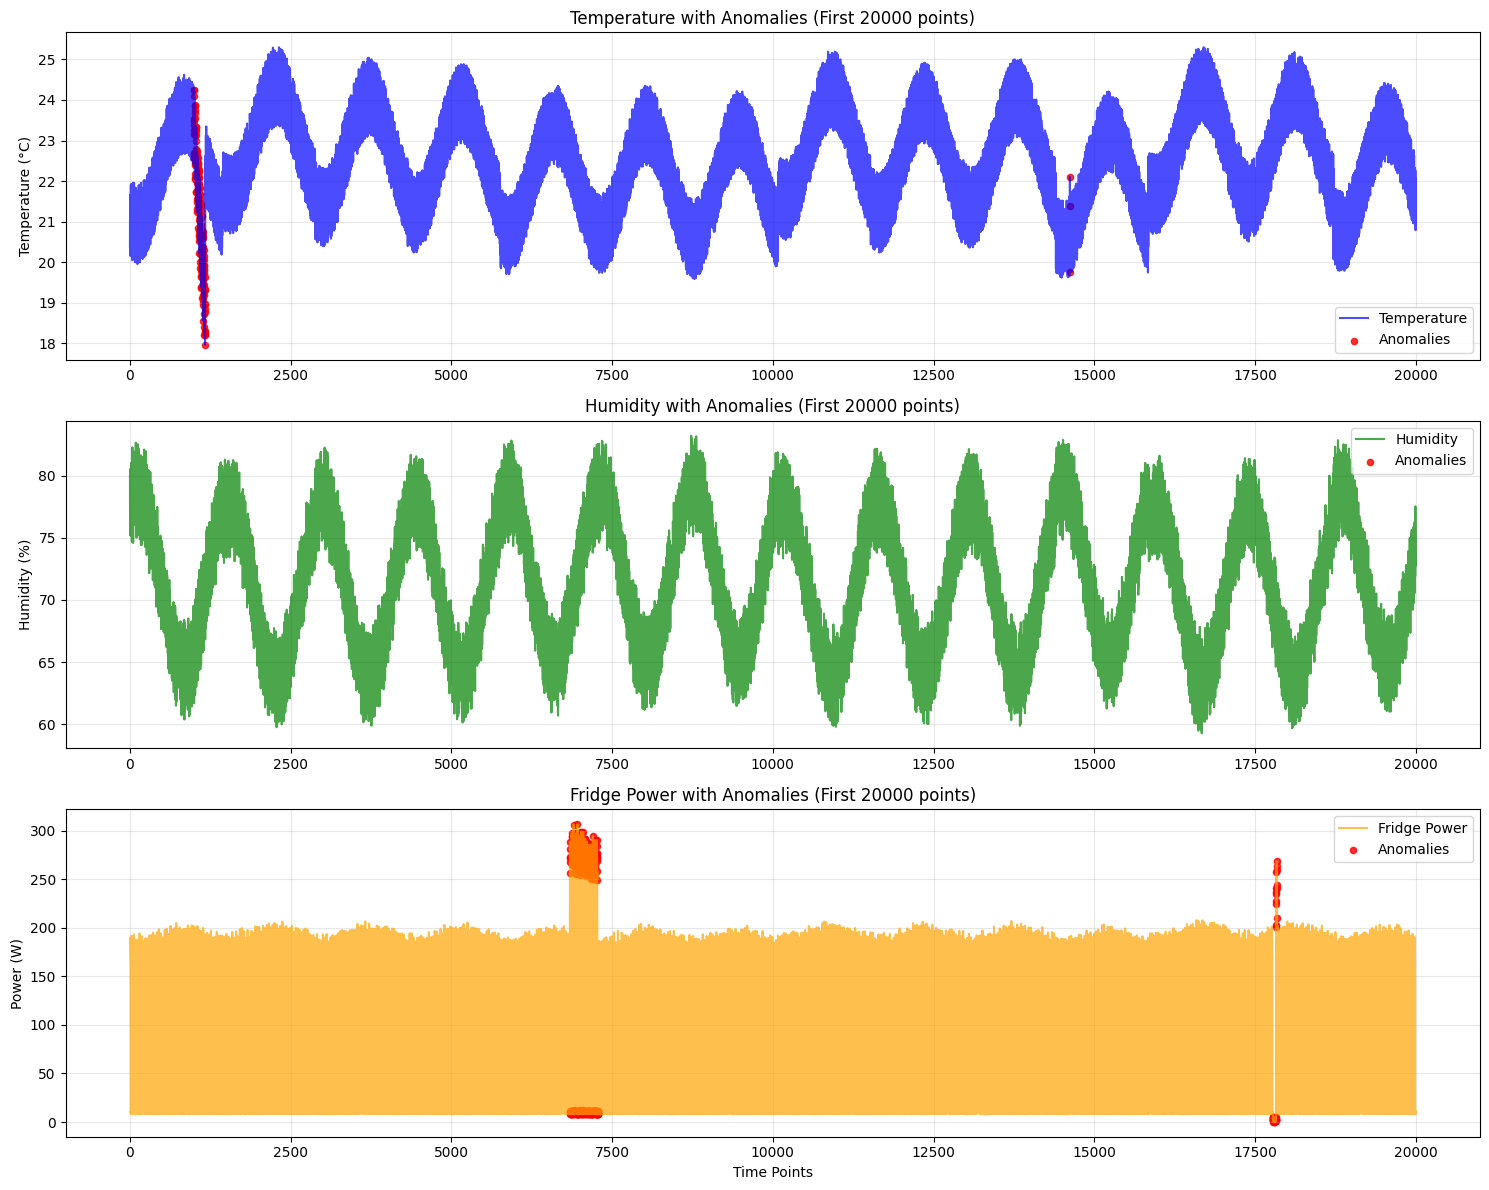

In the sample of 20000 points:
Temperature anomalies visible: 181
Humidity anomalies visible: 0
Fridge power anomalies visible: 503
Total anomalies visible: 1229


In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Create a sample of data for visualization (first 20000 points)
sample_size = 20000
df_sample = df_realistic.head(sample_size)

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Plot temperature with anomalies
axes[0].plot(df_sample.index, df_sample['temperature'], 'b-', alpha=0.7, label='Temperature')
temp_anomalies = df_sample[df_sample['is_anomaly_temperature'] == 1]
axes[0].scatter(temp_anomalies.index, temp_anomalies['temperature'], color='red', s=20, label='Anomalies', alpha=0.8)
axes[0].set_ylabel('Temperature (°C)')
axes[0].set_title('Temperature with Anomalies (First 20000 points)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot humidity with anomalies
axes[1].plot(df_sample.index, df_sample['humidity'], 'g-', alpha=0.7, label='Humidity')
humidity_anomalies = df_sample[df_sample['is_anomaly_humidity'] == 1]
axes[1].scatter(humidity_anomalies.index, humidity_anomalies['humidity'], color='red', s=20, label='Anomalies', alpha=0.8)
axes[1].set_ylabel('Humidity (%)')
axes[1].set_title('Humidity with Anomalies (First 20000 points)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot fridge power with anomalies
axes[2].plot(df_sample.index, df_sample['fridge_power'], 'orange', alpha=0.7, label='Fridge Power')
fridge_anomalies = df_sample[df_sample['is_anomaly_fridge_power'] == 1]
axes[2].scatter(fridge_anomalies.index, fridge_anomalies['fridge_power'], color='red', s=20, label='Anomalies', alpha=0.8)
axes[2].set_ylabel('Power (W)')
axes[2].set_xlabel('Time Points')
axes[2].set_title('Fridge Power with Anomalies (First 20000 points)')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some statistics about the visible anomalies
print(f"In the sample of {sample_size} points:")
print(f"Temperature anomalies visible: {temp_anomalies.shape[0]}")
print(f"Humidity anomalies visible: {humidity_anomalies.shape[0]}")  
print(f"Fridge power anomalies visible: {fridge_anomalies.shape[0]}")
print(f"Total anomalies visible: {df_sample['is_anomaly'].sum()}")

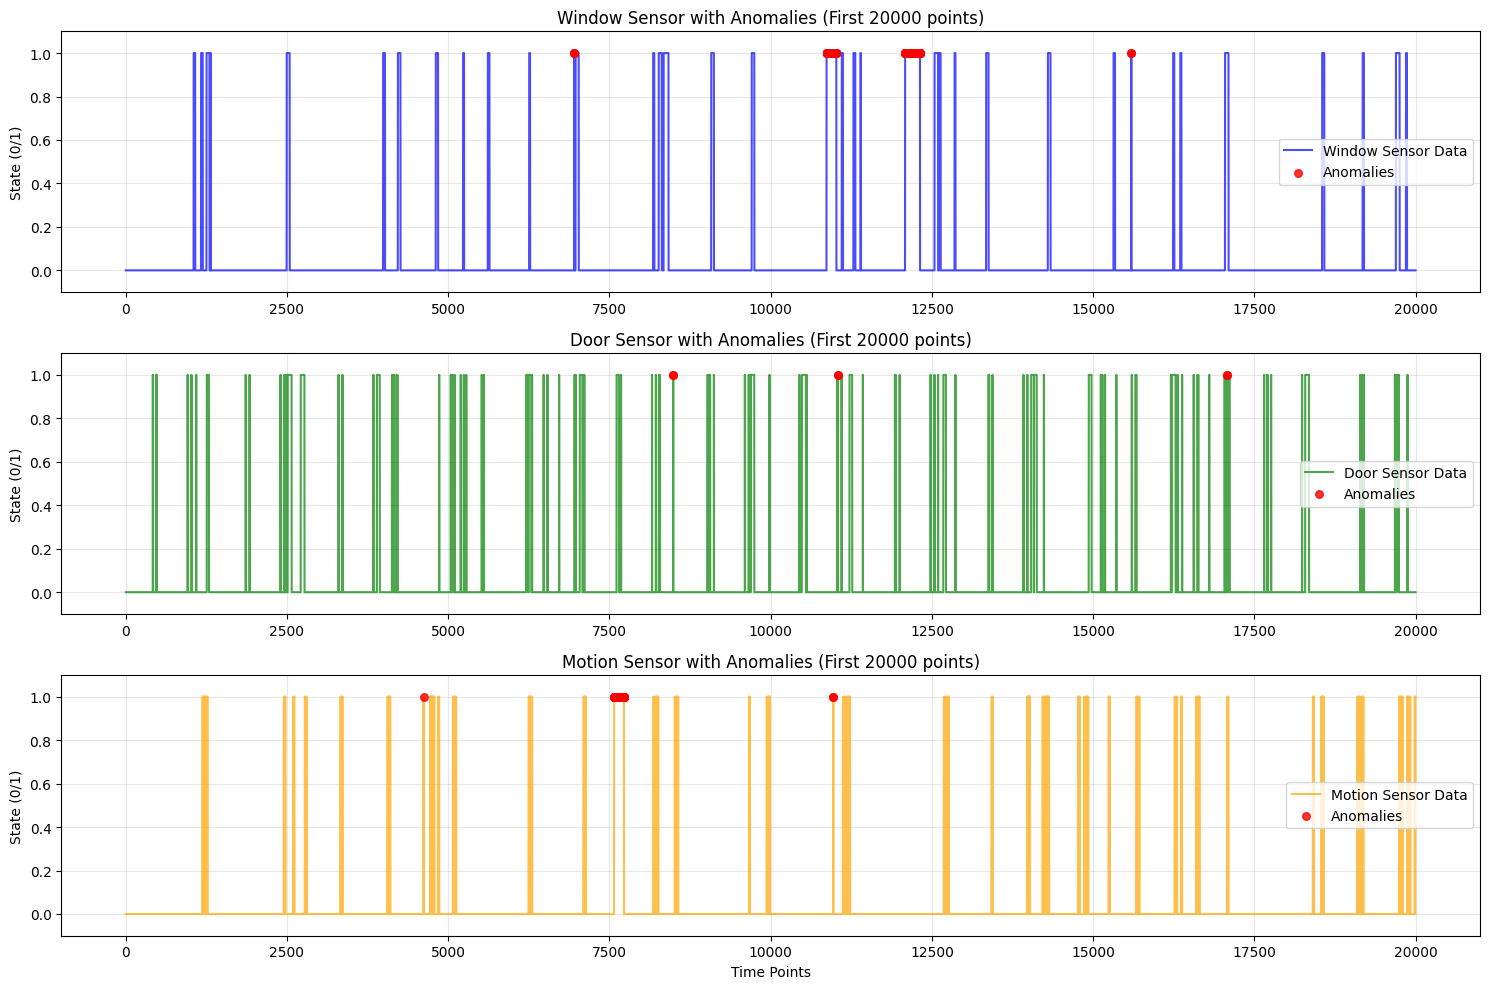

Window Sensor anomalies in sample: 390
Door Sensor anomalies in sample: 6
Motion Sensor anomalies in sample: 154


In [30]:
# Also visualize binary sensor anomalies
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

# Plot binary sensors with anomalies
sensors = ['sensor_window', 'sensor_door', 'sensor_motion']
anomaly_cols = ['is_anomaly_sensor_window', 'is_anomaly_sensor_door', 'is_anomaly_sensor_motion']
colors = ['blue', 'green', 'orange']
titles = ['Window Sensor', 'Door Sensor', 'Motion Sensor']

for i, (sensor, anomaly_col, color, title) in enumerate(zip(sensors, anomaly_cols, colors, titles)):
    # Plot normal sensor data
    axes[i].plot(df_sample.index, df_sample[sensor], color=color, alpha=0.7, label=f'{title} Data')
    
    # Highlight anomalies
    sensor_anomalies = df_sample[df_sample[anomaly_col] == 1]
    if len(sensor_anomalies) > 0:
        axes[i].scatter(sensor_anomalies.index, sensor_anomalies[sensor], 
                       color='red', s=30, label='Anomalies', alpha=0.8, zorder=5)
    
    axes[i].set_ylabel('State (0/1)')
    axes[i].set_title(f'{title} with Anomalies (First 20000 points)')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)
    axes[i].set_ylim(-0.1, 1.1)

axes[2].set_xlabel('Time Points')
plt.tight_layout()
plt.show()

# Print sensor anomaly counts in the sample
for sensor, anomaly_col, title in zip(sensors, anomaly_cols, titles):
    count = df_sample[anomaly_col].sum()
    print(f"{title} anomalies in sample: {count}")

## Comparison: Basic vs Realistic Anomalies

Let's compare the basic fixed-value anomalies with the realistic anomalies to understand the differences:

In [19]:
# Compare anomaly characteristics
print("=== ANOMALY METHOD COMPARISON ===")
print("\n1. BASIC FIXED-VALUE ANOMALIES:")
print(f"   - Total anomalies: {df_basic['is_anomaly'].sum()}")
print(f"   - Anomaly rate: {df_basic['is_anomaly'].mean()*100:.2f}%")
print(f"   - Temperature: {df_basic['is_anomaly_temperature'].sum()} ({df_basic['is_anomaly_temperature'].mean()*100:.2f}%)")
print(f"   - Humidity: {df_basic['is_anomaly_humidity'].sum()} ({df_basic['is_anomaly_humidity'].mean()*100:.2f}%)")
print(f"   - Fridge power: {df_basic['is_anomaly_fridge_power'].sum()} ({df_basic['is_anomaly_fridge_power'].mean()*100:.2f}%)")
print(f"   - Window sensor: {df_basic['is_anomaly_sensor_window'].sum()} ({df_basic['is_anomaly_sensor_window'].mean()*100:.2f}%)")
print(f"   - Door sensor: {df_basic['is_anomaly_sensor_door'].sum()} ({df_basic['is_anomaly_sensor_door'].mean()*100:.2f}%)")
print(f"   - Motion sensor: {df_basic['is_anomaly_sensor_motion'].sum()} ({df_basic['is_anomaly_sensor_motion'].mean()*100:.2f}%)")
print(f"   - Method: Sets sensors to exact fixed values")
print(f"   - Use case: Simple sensor failures, complete breakdowns")

print("\n2. REALISTIC ANOMALIES:")
print(f"   - Total anomalies: {df_realistic['is_anomaly'].sum()}")
print(f"   - Anomaly rate: {df_realistic['is_anomaly'].mean()*100:.2f}%")
print(f"   - Temperature: {df_realistic['is_anomaly_temperature'].sum()} ({df_realistic['is_anomaly_temperature'].mean()*100:.2f}%)")
print(f"   - Humidity: {df_realistic['is_anomaly_humidity'].sum()} ({df_realistic['is_anomaly_humidity'].mean()*100:.2f}%)")
print(f"   - Fridge power: {df_realistic['is_anomaly_fridge_power'].sum()} ({df_realistic['is_anomaly_fridge_power'].mean()*100:.2f}%)")
print(f"   - Window sensor: {df_realistic['is_anomaly_sensor_window'].sum()} ({df_realistic['is_anomaly_sensor_window'].mean()*100:.2f}%)")
print(f"   - Door sensor: {df_realistic['is_anomaly_sensor_door'].sum()} ({df_realistic['is_anomaly_sensor_door'].mean()*100:.2f}%)")
print(f"   - Motion sensor: {df_realistic['is_anomaly_sensor_motion'].sum()} ({df_realistic['is_anomaly_sensor_motion'].mean()*100:.2f}%)")
print(f"   - Method: Gradual changes, realistic failure patterns")
print(f"   - Use case: Real-world sensor degradation, environmental factors")

print("\n3. KEY DIFFERENCES:")
print("   Basic Method:")
print("     • Instant jumps to fixed values")
print("     • Binary on/off behavior")
print("     • Easier to detect")
print("     • Less realistic")
print("\n   Realistic Methods:")
print("     • Gradual onset and recovery")
print("     • Variable intensity and duration") 
print("     • Mimics real failure modes")
print("     • More challenging for detection algorithms")

print("\n4. AVAILABLE REALISTIC METHODS:")
realistic_methods = [
    "inject_temperature_drift_anomalies - Gradual sensor calibration drift",
    "inject_temperature_spike_anomalies - HVAC malfunctions, sunlight",
    "inject_humidity_sudden_change_anomalies - Water leaks, ventilation failure",
    "inject_fridge_power_outage_anomalies - Power cuts with recovery cycles",
    "inject_fridge_efficiency_degradation_anomalies - Component wear, dirty coils",
    "inject_sensor_stuck_anomalies - Hardware failures (stuck open/closed)",
    "inject_sensor_false_trigger_anomalies - Electrical interference, vibrations"
]
for method in realistic_methods:
    print(f"   • {method}")

print(f"\n=== ANOMALY INDICATOR STRUCTURE ===")
print("Each sensor now has its own anomaly indicator:")
print("  • is_anomaly_temperature - Temperature sensor anomalies")
print("  • is_anomaly_humidity - Humidity sensor anomalies")
print("  • is_anomaly_fridge_power - Fridge power sensor anomalies")
print("  • is_anomaly_sensor_window - Window sensor anomalies")
print("  • is_anomaly_sensor_door - Door sensor anomalies")
print("  • is_anomaly_sensor_motion - Motion sensor anomalies")
print("  • is_anomaly - Overall indicator (TRUE if ANY sensor has anomaly)")


=== ANOMALY METHOD COMPARISON ===

1. BASIC FIXED-VALUE ANOMALIES:
   - Total anomalies: 1105
   - Anomaly rate: 0.85%
   - Temperature: 313 (0.24%)
   - Humidity: 237 (0.18%)
   - Fridge power: 253 (0.20%)
   - Window sensor: 77 (0.06%)
   - Door sensor: 61 (0.05%)
   - Motion sensor: 164 (0.13%)
   - Method: Sets sensors to exact fixed values
   - Use case: Simple sensor failures, complete breakdowns

2. REALISTIC ANOMALIES:
   - Total anomalies: 3825
   - Anomaly rate: 2.95%
   - Temperature: 793 (0.61%)
   - Humidity: 351 (0.27%)
   - Fridge power: 1576 (1.22%)
   - Window sensor: 408 (0.31%)
   - Door sensor: 116 (0.09%)
   - Motion sensor: 588 (0.45%)
   - Method: Gradual changes, realistic failure patterns
   - Use case: Real-world sensor degradation, environmental factors

3. KEY DIFFERENCES:
   Basic Method:
     • Instant jumps to fixed values
     • Binary on/off behavior
     • Easier to detect
     • Less realistic

   Realistic Methods:
     • Gradual onset and recovery
 

## Summary

This notebook demonstrates a comprehensive anomaly generation framework for IoT sensor data with two complementary approaches:

In [18]:
print("\n" + "="*60)
print("GENERATED DATASETS:")
print("="*60)

import os
data_dir = '../data/'
files = [f for f in os.listdir(data_dir) if f.endswith('_anomalies.csv')]

for i, file in enumerate(files, 1):
    filepath = os.path.join(data_dir, file)
    size_mb = os.path.getsize(filepath) / (1024*1024)
    print(f"{i}. {file}")
    print(f"   Size: {size_mb:.1f} MB")
    
    # Count anomalies in each file
    import pandas as pd
    df_temp = pd.read_csv(filepath)
    if 'is_anomaly' in df_temp.columns:
        anomaly_count = df_temp['is_anomaly'].sum()
        anomaly_rate = df_temp['is_anomaly'].mean() * 100
        print(f"   Anomalies: {anomaly_count:,} ({anomaly_rate:.2f}%)")
    print(f"   Columns: {len(df_temp.columns)}")
    print()

print("="*60)


GENERATED DATASETS:
1. synthetic_sensors_with_anomalies.csv
   Size: 6.4 MB
   Anomalies: 842 (0.65%)
   Columns: 11

2. synthetic_sensors_realistic_anomalies.csv
   Size: 9.9 MB
   Anomalies: 3,825 (2.95%)
   Columns: 25

3. synthetic_sensors_basic_anomalies.csv
   Size: 8.9 MB
   Anomalies: 1,105 (0.85%)
   Columns: 21

